In [281]:
#importing thr libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [282]:
#inmport the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [283]:
#print the shape of train and test dataset
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [284]:
#print the shape of train and test dataset
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [285]:
#comparing the percentage of null value in train test dataset
train_null = df_train.isnull().mean() * 100
test_null = df_test.isnull().mean() * 100
null_value_df = pd.DataFrame([train_null,test_null])
null_value_df.T

,0,1
Id,0.000000,0.000000
MSSubClass,0.000000,0.000000
MSZoning,0.000000,0.274160
LotFrontage,17.739726,15.558602
LotArea,0.000000,0.000000
Street,0.000000,0.000000
Alley,93.767123,92.666210
LotShape,0.000000,0.000000
LandContour,0.000000,0.000000
Utilities,0.000000,0.137080


In [286]:
#mrege the train and test dataset
mer = pd.merge(df_train,df_test,how='outer',on=None)

In [287]:
#removing columns having more than 50% null value
mer = mer.loc[:,mer.isnull().mean()<.5]
#drop the salePrice (y-variable)
mer = mer.drop(['SalePrice'], axis =1)
mer.shape

(2919, 76)

In [288]:
#taking all the columns having null value
null_column = mer.loc[:,mer.isnull().mean() !=0].columns
null_column

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

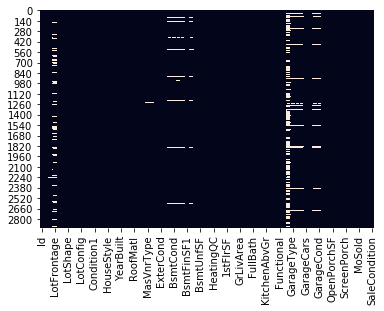

In [289]:
#visual representation of all the null value 
sns.heatmap(mer.isnull(), cbar = False)

In [290]:
#slpiting the columns into categorical and numerical columns
cat_col = mer.describe(include = object).columns
num_col = mer.describe(include = ['float64','int64']).columns

In [291]:
#fillinf null value
#for categorical value MODE
#for numerical value MEDIAN
for i in cat_col:
    mer[i] = mer[i].fillna(mer[i].mode()[0])
for j in num_col:
    mer[j] = mer[j].fillna(mer[j].median())

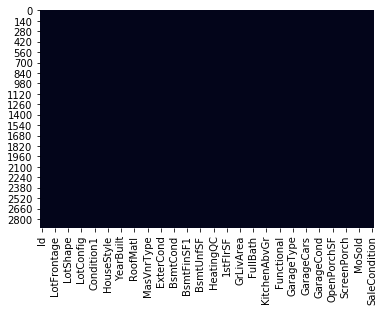

In [292]:
#visual representation of all the null value 
sns.heatmap(mer.isnull(), cbar = False)

In [293]:
#converting the categorical columns into numerical
from sklearn.preprocessing import LabelEncoder
for i in cat_col:
    le=LabelEncoder()
    le.fit(mer[i].astype(str))
    x=le.transform(mer[i].astype(str))
    mer[i]=x


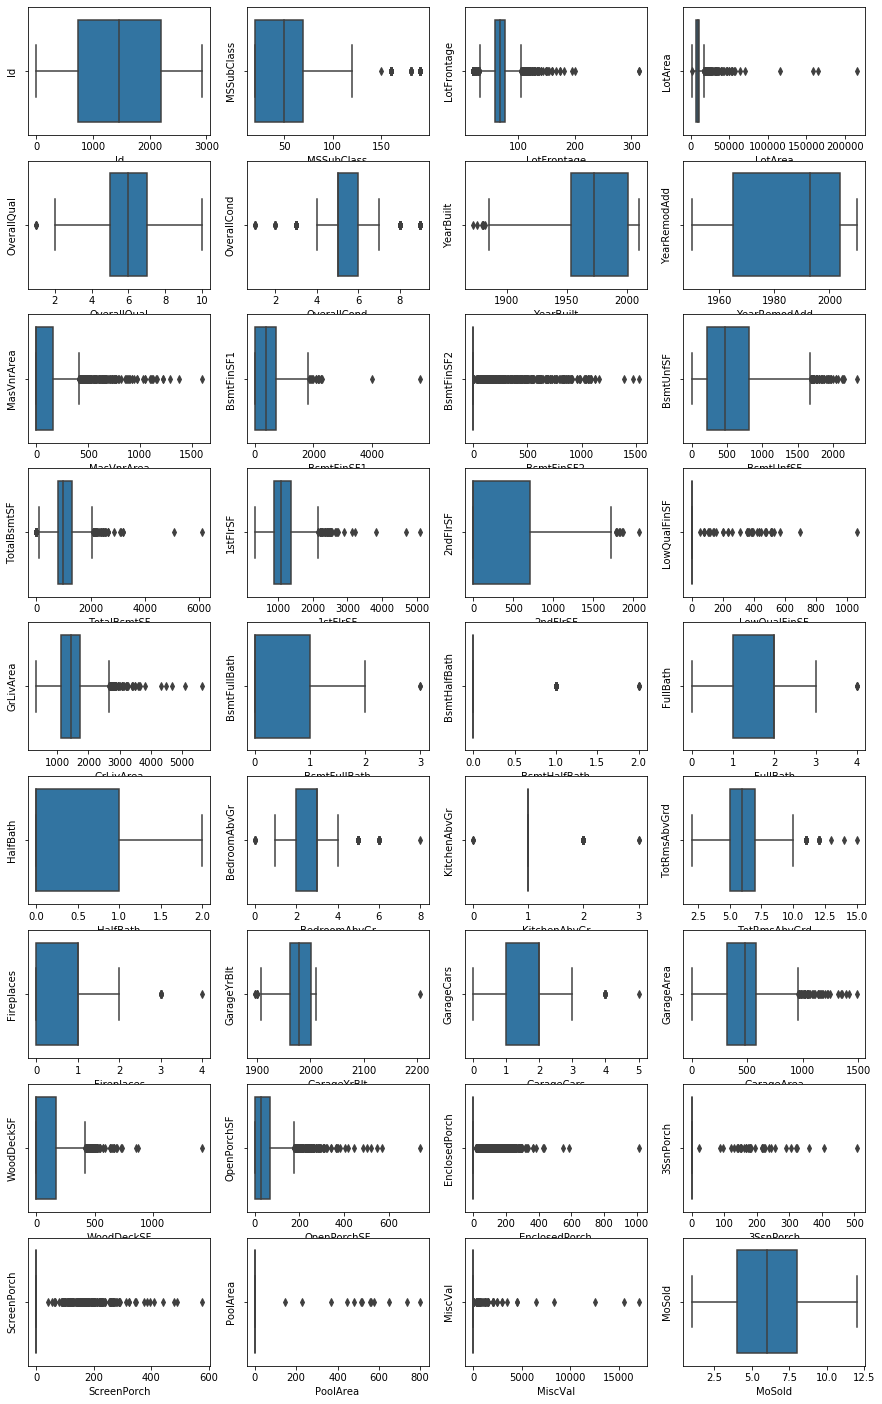

<Figure size 432x288 with 0 Axes>

In [294]:
fig, a = plt.subplots(9,4, figsize=(15,25))
k = 0
for i in range(9):
    for j in range(4):
        sns.boxplot(mer[num_col[k]],ax = a[i,j]  ).set(ylabel=num_col[k] )
        k+=1
plt.show()
plt.tight_layout()


In [295]:
Q1 = mer['OverallQual'].quantile(.25)
Q3 = mer['OverallQual'].quantile(.75)
IQ = Q3-Q1
min_val = Q1 - 1.5*IQ
max_val = Q3 + 1.5*IQ
mer.loc[mer['OverallQual'] < min_val] = min_val
mer.loc[(mer['OverallQual'] > max_val)] = max_val

In [296]:
p = 0
nn = list(num_col)
for i in range(len(nn)):
    Q1 = mer[nn[p]].quantile(.25)
    Q3 = mer[nn[p]].quantile(.75)
    IQ = Q3-Q1
    min_val = Q1 - 1.5*IQ
    max_val = Q3 + 1.5*IQ
    mer.loc[(mer[nn[p]] < min_val), nn[p]] = min_val
    mer.loc[(mer[nn[p]] > max_val), nn[p]] = max_val
    p+=1

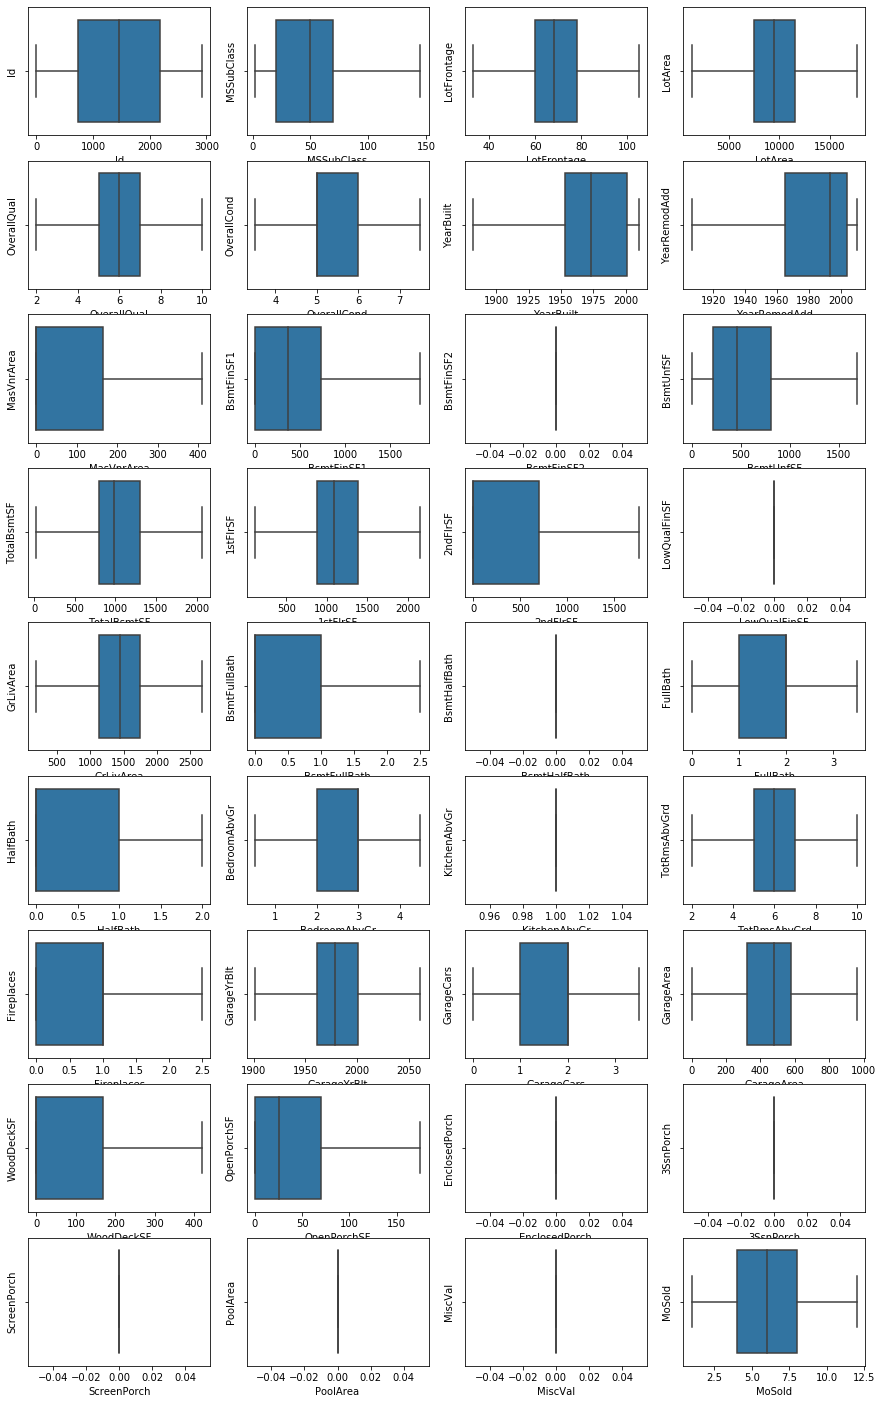

<Figure size 432x288 with 0 Axes>

In [297]:
fig, a = plt.subplots(9,4, figsize=(15,25))
k = 0
for i in range(9):
    for j in range(4):
        sns.boxplot(mer[num_col[k]],ax = a[i,j] ).set(ylabel=num_col[k] )
        k+=1
plt.show()
plt.tight_layout()

In [298]:
no_var_col = mer[num_col].var().sort_values().head(9).index
#mer = mer.drop(no_var_col, axis = 1)

In [299]:
dist = mer[num_col].drop(no_var_col,axis = 1)

In [300]:
d = dist.columns

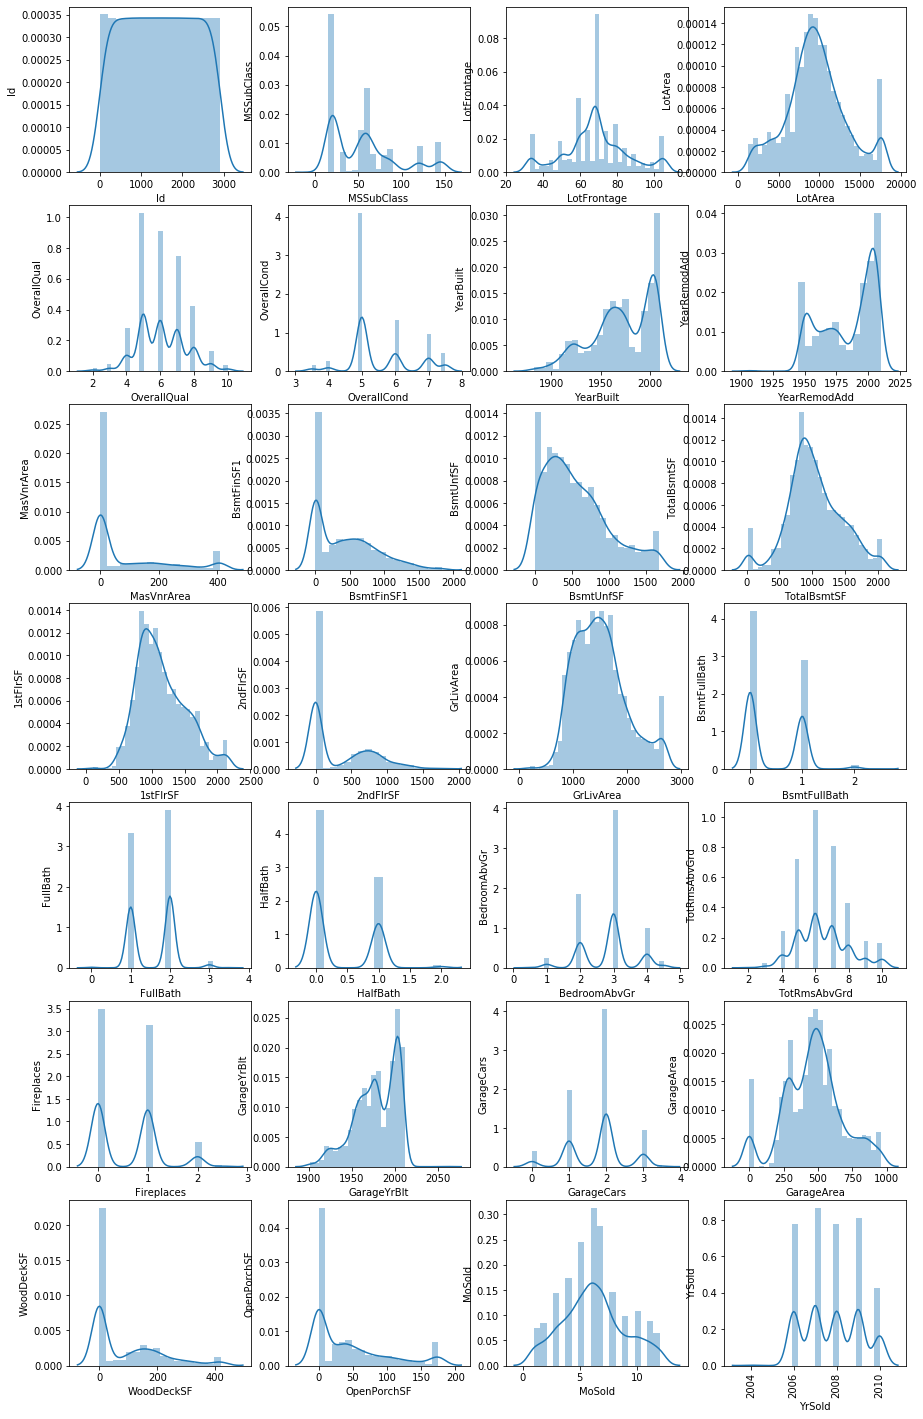

<Figure size 432x288 with 0 Axes>

In [301]:
fig, a = plt.subplots(7,4, figsize=(15,25))
k = 0
for i in range(7):
    for j in range(4):
        sns.distplot(mer[d[k]],ax = a[i,j] ).set(ylabel=d[k] )
        plt.xticks(rotation=90)
        k+=1
plt.show()
plt.tight_layout()

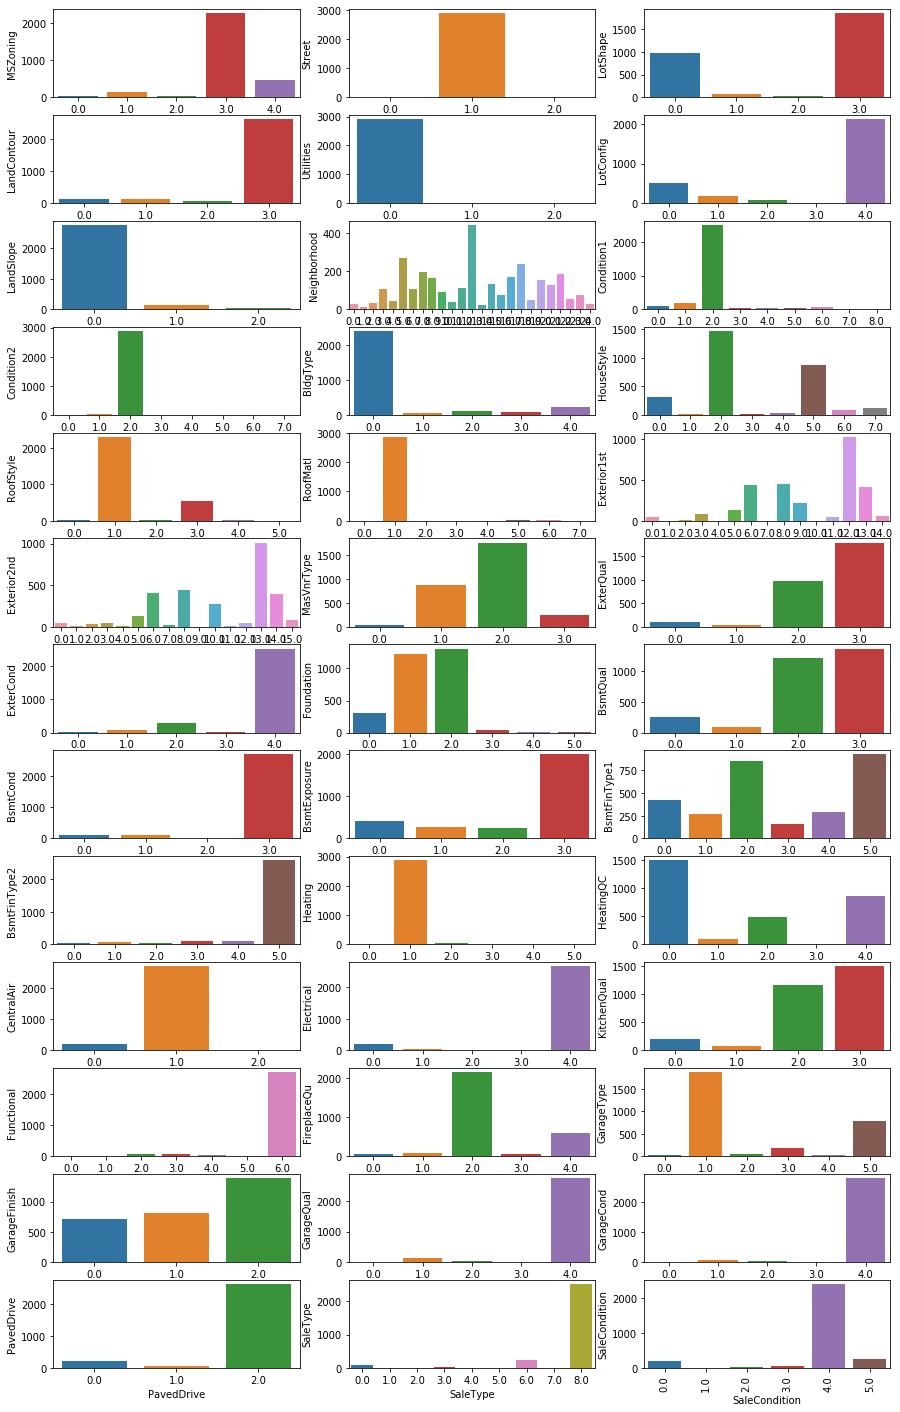

<Figure size 432x288 with 0 Axes>

In [302]:
fig, a = plt.subplots(13,3, figsize=(15,25))
k = 0
for i in range(13):
    for j in range(3):
        sns.countplot(mer[cat_col[k]],ax = a[i,j] ).set(ylabel=cat_col[k] )
        plt.xticks(rotation=90)
        k+=1
plt.show()
plt.tight_layout()

In [303]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [304]:
variables = mer[d]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,4.013020,Id
1,5.399557,MSSubClass
2,31.340096,LotFrontage
3,16.686189,LotArea
4,61.680436,OverallQual
5,53.069917,OverallCond
6,18458.054561,YearBuilt
7,21709.514959,YearRemodAdd
8,2.029106,MasVnrArea
9,14.243213,BsmtFinSF1


In [308]:

mer = mer.drop('Id', axis = 1)


In [309]:
new_col = mer.columns

In [310]:
from sklearn.preprocessing import StandardScaler

In [311]:
ss = StandardScaler()
ss.fit(mer)
x=ss.transform(mer)
mer = pd.DataFrame(x,columns = new_col )

In [312]:
new_train = mer.ix[:1459]
new_test = mer.ix[1460:]

C:\Users\kiit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\kiit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [313]:
new_train['SalePrice'] = df_train['SalePrice']

C:\Users\kiit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [314]:
new_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.124132,-0.040008,-0.200709,-0.307306,0.037043,0.74737,0.317096,-0.040435,0.590230,-0.21612,...,0.0,0.0,0.0,0.0,0.0,-1.551290,0.160467,0.321889,0.206292,208500
1,-0.933644,-0.040008,0.679152,0.010389,0.037043,0.74737,0.317096,-0.040435,-0.656428,-0.21612,...,0.0,0.0,0.0,0.0,0.0,-0.446398,-0.596241,0.321889,0.206292,181500
2,0.124132,-0.040008,-0.024737,0.466213,0.037043,-1.38238,0.317096,-0.040435,0.590230,-0.21612,...,0.0,0.0,0.0,0.0,0.0,1.026791,0.160467,0.321889,0.206292,223500
3,0.388576,-0.040008,-0.493996,-0.003424,0.037043,-1.38238,0.317096,-0.040435,-1.903085,-0.21612,...,0.0,0.0,0.0,0.0,0.0,-1.551290,-1.352950,0.321889,-3.505060,140000
4,0.124132,-0.040008,0.913782,1.297745,0.037043,-1.38238,0.317096,-0.040435,-0.656428,-0.21612,...,0.0,0.0,0.0,0.0,0.0,2.131683,0.160467,0.321889,0.206292,250000


In [315]:
y = new_train['SalePrice']
X = new_train.drop('SalePrice',axis = 1)

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [317]:
from sklearn.linear_model import LinearRegression

In [318]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
acutals = y_test
predicted =lr.predict(X_test) 

In [319]:
def model_validation(acutals,predicted):
    erorr=abs(acutals-predicted).sum()
    print("total error in the model",erorr)
    print("mean error in the model ",erorr/X_test.shape[0])
    from sklearn.metrics import mean_absolute_error
    print("mean absolute error",mean_absolute_error(acutals,predicted))
    from sklearn.metrics import mean_squared_error
    print("mean squared error",mean_squared_error(acutals,predicted))
    from sklearn.metrics import mean_squared_error
    print("root mean sqaure error" ,np.sqrt(mean_squared_error(acutals,predicted)))
    print("MAPE",(1/len(acutals))*(erorr/acutals.sum())*100)

In [320]:
model_validation(acutals,predicted)

total error in the model 8630538.75139793
mean error in the model  19704.426373054634
mean absolute error 19704.426373054634
mean squared error 927192277.4346907
root mean sqaure error 30449.832141322073
MAPE 0.02499186091789354


In [321]:
from sklearn.metrics import r2_score

In [322]:
r2_score(acutals,predicted)

0.8671281428425686